# Figuras

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from rdkit.Chem import AllChem as Chem
from rdkit.DataStructs import ConvertToNumpyArray
from rdkit.Chem import Descriptors

from padelpy import padeldescriptor 

from scaffold_splits import scaffold_split 

from utils import *

### Histograma count / nm

/home/xavi/Escritorio/midirectorio/utils.py:114: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider using pd.concat instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  df = df.groupby(['smiles','solvent']).agg(agg_dict).reset_index()


Filas x columnas: (23708, 3033)
Mínimo de pico de lambda: 162.0
Máximo de pico de lambda: 1026.0


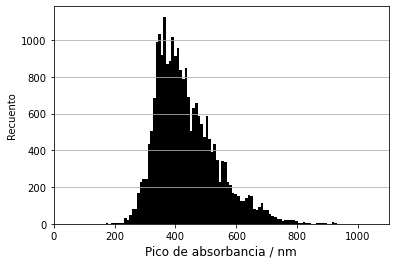

In [11]:
df = pd.read_csv('scaled_df.csv')
no_duplicates_df = handle_duplicates(df, cutoff=5)
df = no_duplicates_df.copy()

no_duplicates_df['peakwavs_max'].hist(bins=100, color = 'k')
plt.xlim(0,1100)
plt.xlabel('Pico de absorbancia / nm', fontsize=12, color='k')
plt.ylabel('Recuento')
plt.grid(which= 'minor', axis = 'y')
plt.grid(False, axis='x')

plot_name = f"figuras/hist_picos.pdf"
plt.savefig(plot_name, dpi=600, bbox_inches='tight')


print(f'Filas x columnas: {df.shape}')
print(f'Mínimo de pico de lambda: {df["peakwavs_max"].min()}')
print(f'Máximo de pico de lambda: {df["peakwavs_max"].max()}')


# **validación final**

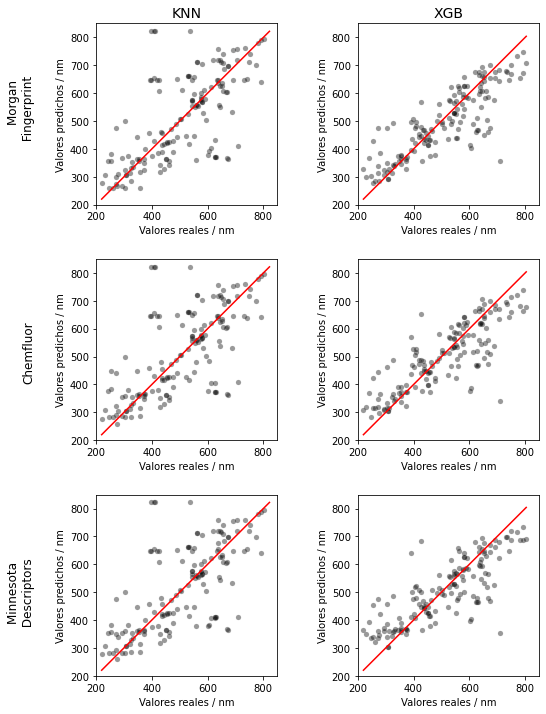

In [91]:
# Configuraciones
metodos = ['knn', 'xgb']
representaciones = ['morgan_fingerprint', 'chemfluor', 'minnesota_descriptors']
rep_labels = [f'Morgan \n Fingerprint', 'Chemfluor', f'Minnesota \n Descriptors']

# Crear figura y ejes
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(8.3, 12))
plt.subplots_adjust(wspace=0.3, hspace=0.3)

# Iterar por representación y método
for i, (rep, rep_label) in enumerate(zip(representaciones, rep_labels)):
    for j, metodo in enumerate(metodos):
        ax = axes[i, j]

        df = pd.read_csv(f'Resultados/val_final/{metodo}_{rep}.csv')
        x = df['real']
        y = df['predicho']

        sns.scatterplot(x=x, y=y, marker='o', s=25, edgecolor='tab:gray', alpha=0.4, color='k', ax=ax)

        # Ejes y líneas
        y_min = min(x.min(), y.min())
        y_max = max(x.max(), y.max())
        inf = 200
        sup = 850
        ax.set_xlim(inf, sup)
        ax.set_ylim(inf, sup)
        ax.plot([y_min, y_max], [y_min, y_max], color='r', linestyle='-')
        ax.set_aspect('equal', adjustable='box')
        
        ax.set_xlabel("Valores reales / nm")
        ax.set_ylabel("Valores predichos / nm")

        # Quitar título individual del gráfico (usaremos encabezados por columna y fila)
        ax.set_title("")

        # Etiqueta del método arriba de la primera fila
        if i == 0:
            ax.set_title(metodo.upper(), fontsize=14)

        # Etiqueta de la representación a la izquierda de cada fila
        if j == 0:
            fig.text(0.04, 0.78 - i * 0.28, rep_label, va='center', ha='right', fontsize=12, rotation=90)

# Guardar y mostrar
plt.savefig('figuras/val_final/comparativa_metodos.pdf', bbox_inches='tight', dpi=600)
plt.show()


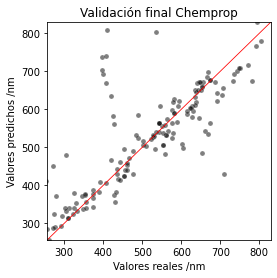

In [152]:
# ____CHEMPROP____

predicciones = pd.read_csv('chemprop/preds.csv')
real = pd.read_csv('chemprop/chemprop_data_val.csv')

x = real['peakwavs_max']
y = predicciones['peakwavs_max']

plt.figure(figsize=(4, 4))
sns.scatterplot(x=x, y=y, marker = 'o', s = 25, edgecolors = 'tab:gray' , alpha = 0.5, color = 'k')
plt.xlabel("Valores reales /nm")
plt.ylabel("Valores predichos /nm")
plt.title("Validación final Chemprop")

# Se ponen los límites de los ejes superiores e inferiores como el máximo y mínimo
(inf, sup) = plt.xlim(min(y.min(), y.min()), max(y.max(), y.max()))
plt.ylim(inf, sup)
plt.plot([inf, sup], [inf, sup], color='r', linestyle='-', linewidth = 0.8)
plt.savefig('figuras/val_final/chemprop_val.png', bbox_inches='tight', dpi=500)
plt.show()

In [71]:
print(x.min(), y.min())
print(x.max(), y.max())

220 302.2144
804 732.1574


# **figura barras errores**

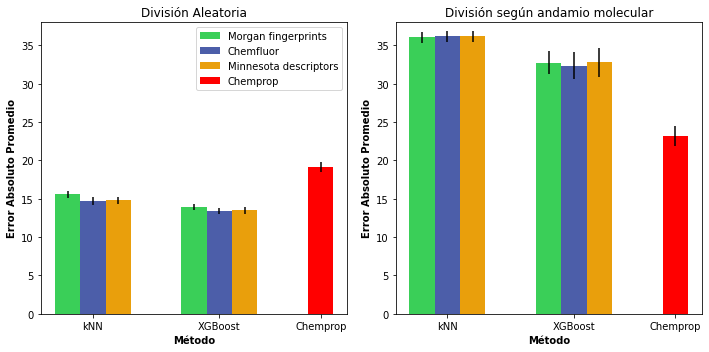

In [7]:
anchura = 0.2

# Datos solo para kNN y XGBoost
maes_morgan_rand = [15.58, 13.88]
maes_chemfluor_rand = [14.70, 13.46]
maes_minnesota_rand = [14.81, 13.49]

dest_morgan_rand = [0.47, 0.39]
dest_chemfluor_rand = [0.49, 0.4]
dest_minnesota_rand = [0.46, 0.46]

maes_morgan_scaffold = [36.09, 32.74]
maes_chemfluor_scaffold = [36.18, 32.32]
maes_minnesota_scaffold = [36.17, 32.78]

dest_morgan_scaffold = [0.72, 1.52]
dest_chemfluor_scaffold = [0.73, 1.76]
dest_minnesota_scaffold = [0.71, 1.90]

# Solo un valor para Chemprop 
maes_chemprop_rand = [19.16]
maes_chemprop_scaffold = [23.13]

dest_chemprop_rand = [0.62]
dest_chemprop_scaffold = [1.3]

# Posiciones: 0 = kNN, 1 = XGBoost, 2 = Chemprop
r = np.arange(3)
r2 = r + anchura
r3 = r2 + anchura

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))

# === Gráfico 1: Random split ===
ax1.set_ylim([0, 38])
ax1.bar(r[0:2], maes_morgan_rand,     yerr = dest_morgan_rand,    width=anchura, align='center', label='Morgan fingerprints', color='#3ACF58')
ax1.bar(r2[0:2], maes_chemfluor_rand, yerr = dest_chemfluor_rand, width=anchura, align='center', label='Chemfluor', color='#4C5EA9')
ax1.bar(r3[0:2], maes_minnesota_rand, yerr = dest_minnesota_rand, width=anchura, align='center', label='Minnesota descriptors', color='#E99F0C')
ax1.bar(r[2], maes_chemprop_rand[0],  yerr = dest_chemprop_rand,  width=anchura, align='center', label='Chemprop', color='red')

# === Gráfico 2: Scaffold split ===
ax2.set_ylim([0, 38])
ax2.bar(r[0:2], maes_morgan_scaffold,yerr = dest_morgan_scaffold,    width=anchura, align='center', label='Morgan fingerprints', color='#3ACF58')
ax2.bar(r2[0:2], maes_chemfluor_scaffold,yerr = dest_chemfluor_scaffold, width=anchura, align='center', label='Chemfluor', color='#4C5EA9')
ax2.bar(r3[0:2], maes_minnesota_scaffold,yerr = dest_minnesota_scaffold, width=anchura, align='center', label='Minnesota descriptors', color='#E99F0C')
ax2.bar(r[2], maes_chemprop_scaffold[0],yerr = dest_chemprop_scaffold,  width=anchura, align='center', label='Chemprop', color='red') 

# Títulos y etiquetas
ax1.set_title('División Aleatoria')
ax1.set_xlabel('Método', fontweight='bold')
ax1.set_ylabel('Error Absoluto Promedio', fontweight='bold')

ax2.set_title('División según andamio molecular')
ax2.set_xlabel('Método', fontweight='bold')
ax2.set_ylabel('Error Absoluto Promedio', fontweight='bold')

# Etiquetas del eje X
ax1.set_xticks([0.2, 1.2, 2])
ax1.set_xticklabels(['kNN', 'XGBoost', 'Chemprop'])

ax2.set_xticks([0.2, 1.2, 2])
ax2.set_xticklabels(['kNN', 'XGBoost', 'Chemprop'])

# Leyenda (solo una vez para evitar duplicados)
ax1.legend()
#ax2.legend()

plt.tight_layout()
plt.savefig('Resultados/maes_split_features.pdf', bbox_inches='tight')
plt.savefig('Resultados/maes_split_features.png', dpi=300, bbox_inches='tight')
plt.show()

# espectro absorción

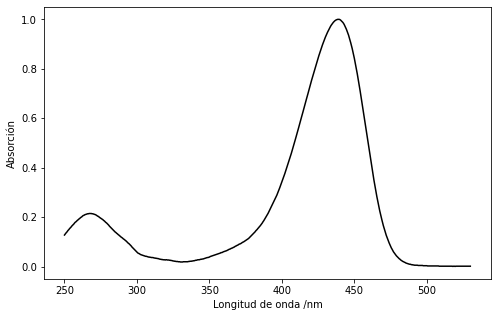

In [14]:
espectro = pd.read_csv('/home/xavi/Escritorio/midirectorio/figuras/ATTO425_PBS_abs.csv')

lambdas = espectro['wavelength']
absorcion = espectro['absorption']

plt.figure(figsize=(8, 5))
sns.lineplot(x=lambdas, y=absorcion, color = 'k')
plt.xlabel("Longitud de onda /nm")
plt.ylabel("Absorción")

plt.savefig('/home/xavi/Escritorio/midirectorio/figuras/ATTO425_PBS_abs.svg', bbox_inches='tight', dpi=500)

# validación cruzada

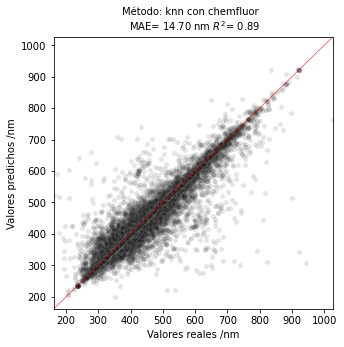

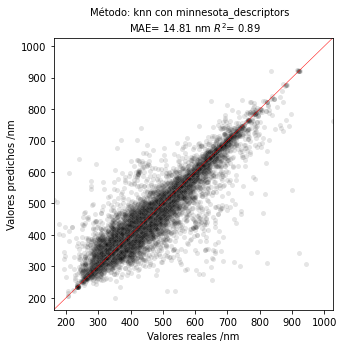

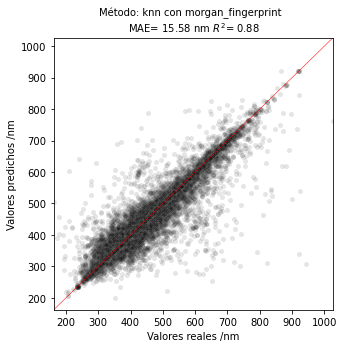

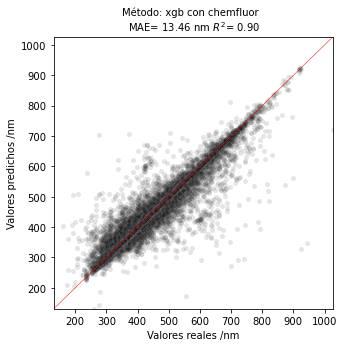

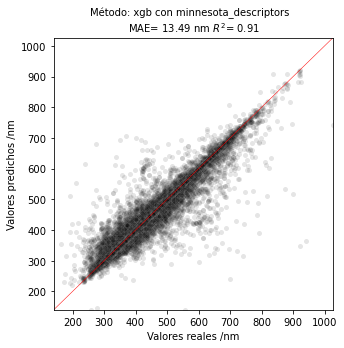

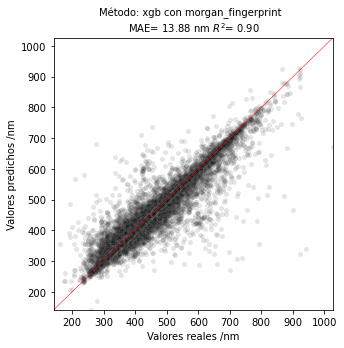

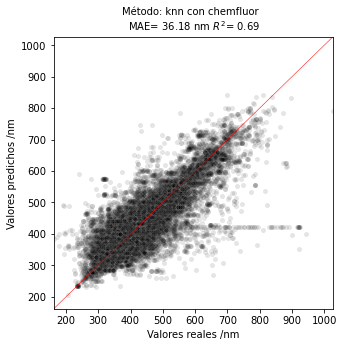

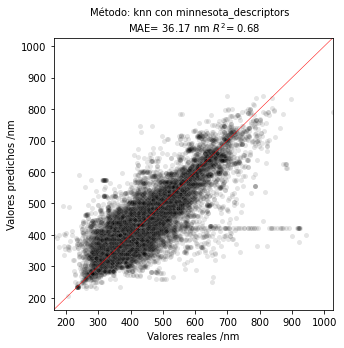

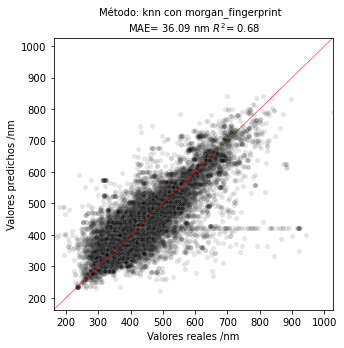

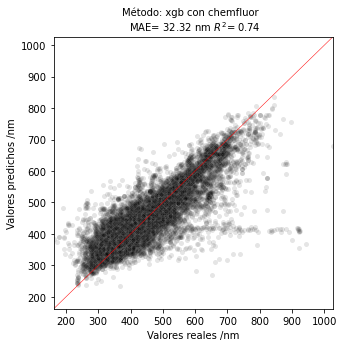

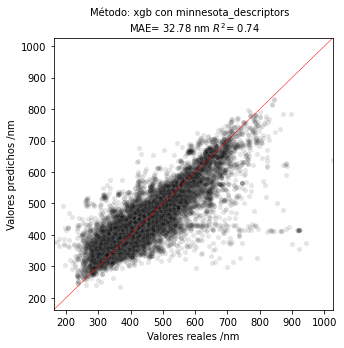

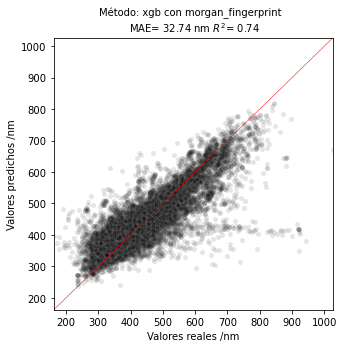

In [17]:
for division in ['random', 'scaffold']:
    for metodo in ['knn', 'xgb']:
        for solv_representation  in ['chemfluor', 'minnesota_descriptors', 'morgan_fingerprint']:
            
            df = pd.read_csv(f'Resultados/CV/{division}/{metodo}_{solv_representation}.csv')
            
            x = df['real']
            y = df['predicho']
            mae = mean_absolute_error(x, y)
            r2 = r2_score(x, y)

            
            plt.figure(figsize=(5, 5))
            sns.scatterplot(x=x, y=y, marker = 'o', s = 25, alpha = 0.1, color = 'k')
            plt.xlabel("Valores reales /nm")
            plt.ylabel("Valores predichos /nm")
            
            plt.title(f'Método: {metodo} con {solv_representation}  \n MAE= {mae:.2f} nm $R^2$= {r2:.2f} ', fontsize=10)
            # Se ponen los límites de los ejes superiores e inferiores como el máximo y mínimo
            (inf, sup) = plt.xlim(min(y.min(), x.min()), max(y.max(), x.max()))
            plt.ylim(inf, sup)
            plt.plot([inf, sup], [inf, sup], color='r', linestyle='-', linewidth = 0.5)
            plt.savefig(f'figuras/CV/{division}/{metodo}_{solv_representation}.png', bbox_inches='tight', dpi=500)

